In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Python_Project_Youtube/US_Accidents_March23_sampled_500k.csv")

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Python_Project_Youtube/US_Accidents_Dataset1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Python_Project_Youtube/US_Accidents_Dataset2.csv")

In [ ]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,False,False,False,False,True,False
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,False,False,False,False
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,False,False,False,False,True,False
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,False,False,False,False
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2.head()

,ID,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Day,Day,Day,Day
1,A-4694324,Night,Night,Night,Night
2,A-5006183,Day,Day,Day,Day
3,A-4237356,Day,Day,Day,Day
4,A-6690583,Night,Night,Night,Night


In [ ]:
df1.shape[0]

500000

In [ ]:
join_df = df1.merge(df2,how="outer",right_on = ["ID"],left_on=["ID"])
join_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
join_df.shape[0]

500000

In [ ]:
# Info about the data shape, type of individual columns, count
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [ ]:
# Summary of Statistics For numerical columns
join_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [ ]:
join_df.isna().sum().sort_values(ascending = False)

End_Lat                  220377
End_Lng                  220377
Precipitation(in)        142616
Wind_Chill(F)            129017
Wind_Speed(mph)           36987
Visibility(mi)            11291
Wind_Direction            11197
Humidity(%)               11130
Weather_Condition         11101
Temperature(F)            10466
Pressure(in)               8928
Weather_Timestamp          7674
Nautical_Twilight          1483
Civil_Twilight             1483
Sunrise_Sunset             1483
Astronomical_Twilight      1483
Airport_Code               1446
Street                      691
Timezone                    507
Zipcode                     116
City                         19
Description                   1
Traffic_Signal                0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Country                       0
Turning_Loop                  0
No_Exit                       0
End_Time                      0
Start_Ti

In [ ]:
missing_percentage = (join_df.isna().sum().sort_values(ascending=False) /
                      len(join_df))[lambda x: x != 0]
missing_percentage

End_Lat                  0.440754
End_Lng                  0.440754
Precipitation(in)        0.285232
Wind_Chill(F)            0.258034
Wind_Speed(mph)          0.073974
Visibility(mi)           0.022582
Wind_Direction           0.022394
Humidity(%)              0.022260
Weather_Condition        0.022202
Temperature(F)           0.020932
Pressure(in)             0.017856
Weather_Timestamp        0.015348
Nautical_Twilight        0.002966
Civil_Twilight           0.002966
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
dtype: float64

Addressing missing data effectively is crucial for maintaining the integrity of your analysis, especially when significant portions of your data are missing, as seen with your End_Lat, End_Lng, Precipitation(in), and Wind_Chill(F) columns. Here are two popular techniques to handle missing data, which you can demonstrate in your video:

Imputation Based on Other Features
For End_Lat and End_Lng, assuming these represent the latitude and longitude at the end of an event (like a traffic accident) and given their high percentage of missingness (~44%), removing these rows might not be viable due to the significant data loss. Instead, consider imputation based on geographical data or relationships within your dataset:

1. K-Nearest Neighbors (KNN) Imputation: This technique can be particularly
effective. KNN Imputation replaces missing values using the mean values from 'K' nearest neighbors found in the training set. Each sample’s missing values are imputed using the mean value from 'n' nearest neighbors among the training samples.

2. Statistical Imputation for Weather-Related Features
For weather-related features like Precipitation(in), Wind_Chill(F), Wind_Speed(mph), and others, you can use statistical imputation methods that are simpler and often effective:

Median Imputation: Weather conditions can vary significantly, and using the median can be more robust to outliers than the mean. This method is particularly useful for continuous variables that are not normally distributed.


Handling Small Amounts of Missing Data
For columns with a very small percentage of missing values (like City, Description, Timezone, etc.), if imputation does not seem appropriate or feasible due to the nature of the data, it might be reasonable to remove these rows, especially when the missing rate is below a certain threshold (e.g., 1-2%).

Start Point (Start_Lat, Start_Lng): The location where the accident was reported or where it started.

End Point (End_Lat, End_Lng): The location where the accident impact ends or where the road segment affected by the accident ends.

Distance (Distance(mi)): The length of the road affected by the accident, which can give an idea of the accident's extent and impact on traffic flow.

Handling missing values in columns like End_Lat and End_Lng can indeed be challenging due to their nature: they represent geographical coordinates, and imputing them requires considering spatial relationships rather than just statistical averages. We should consider other methods to impute these missing values effectively like:

Geospatial Interpolation:

Use geospatial interpolation methods like Inverse Distance Weighting (IDW) or Kriging to estimate the missing coordinates. These methods consider the distance between known points to predict the missing values, which might be more appropriate for geographical data.

This approach is well-suited for your dataset since you have geographical coordinates (Start_Lat, Start_Lng) and a Distance(mi) column. If the accidents tend to occur within a relatively short distance from the start point, geospatial interpolation can use the spatial correlation between known end points to estimate the missing end points.

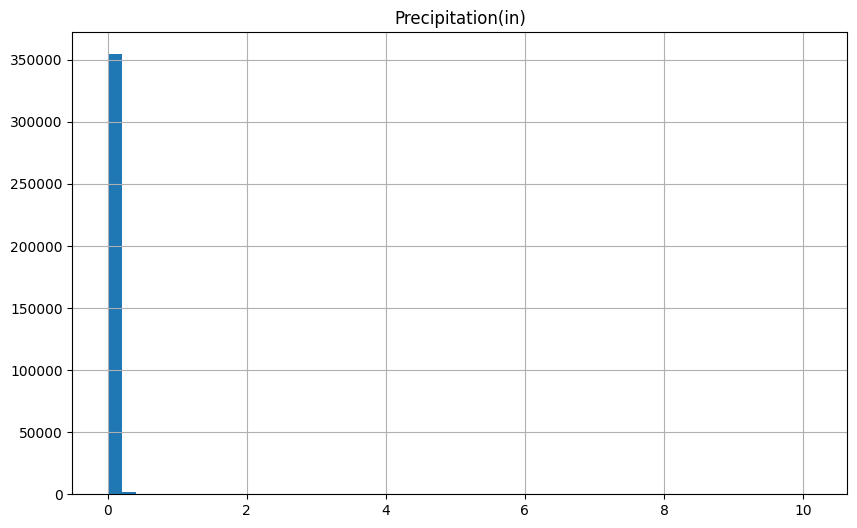

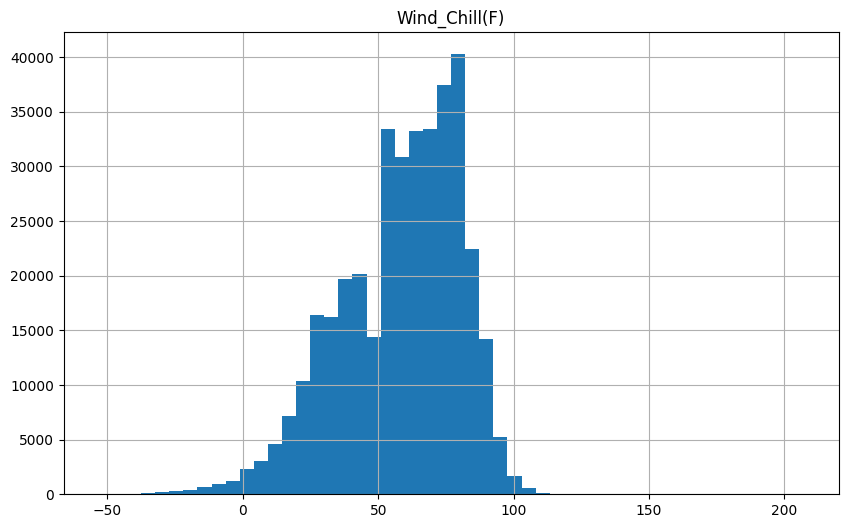

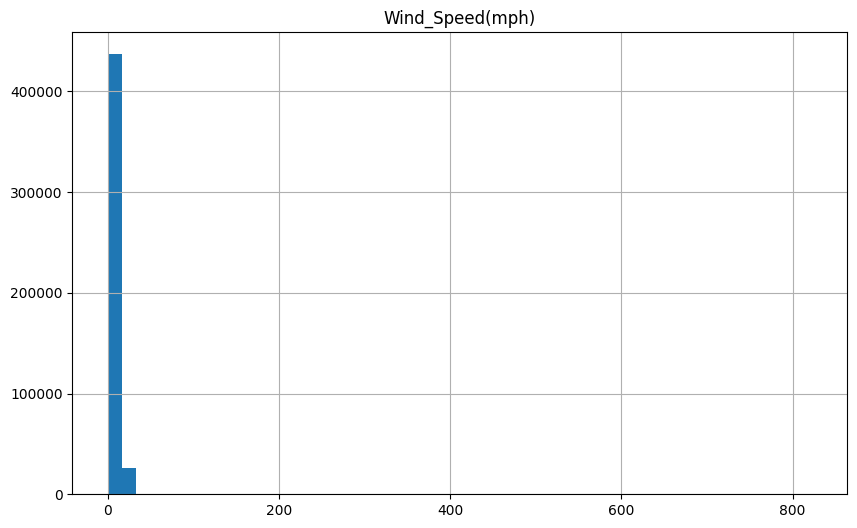

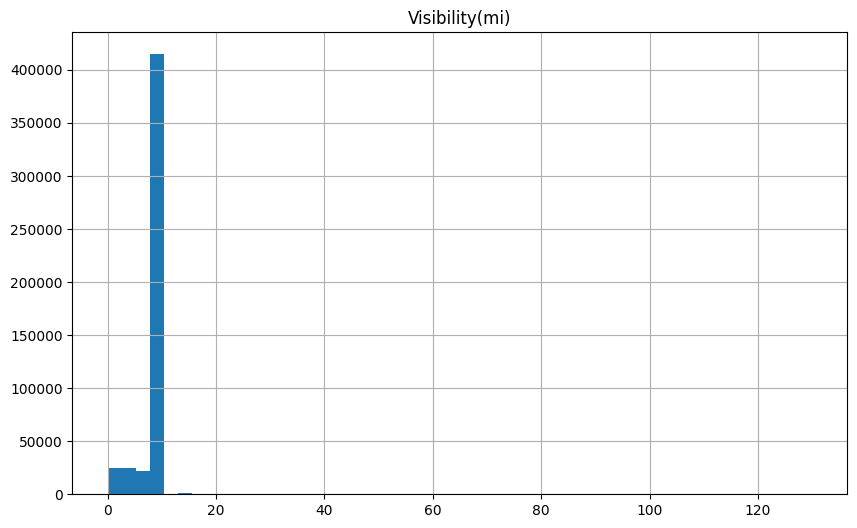

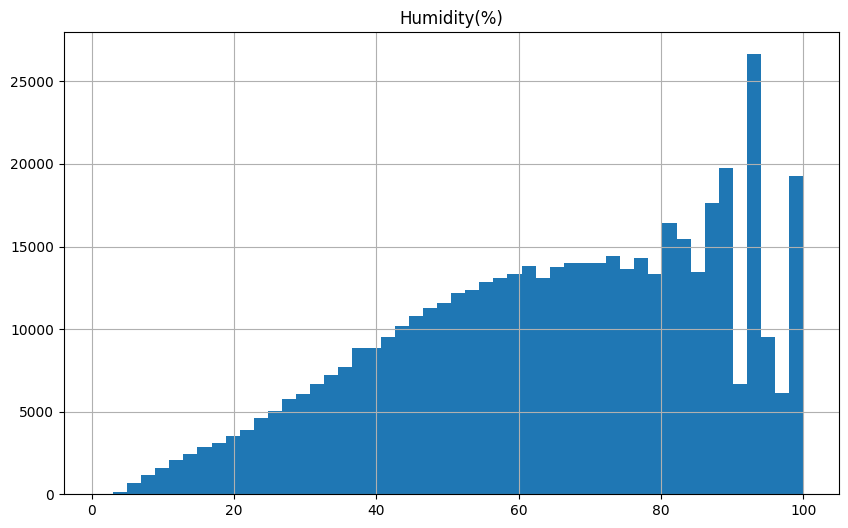

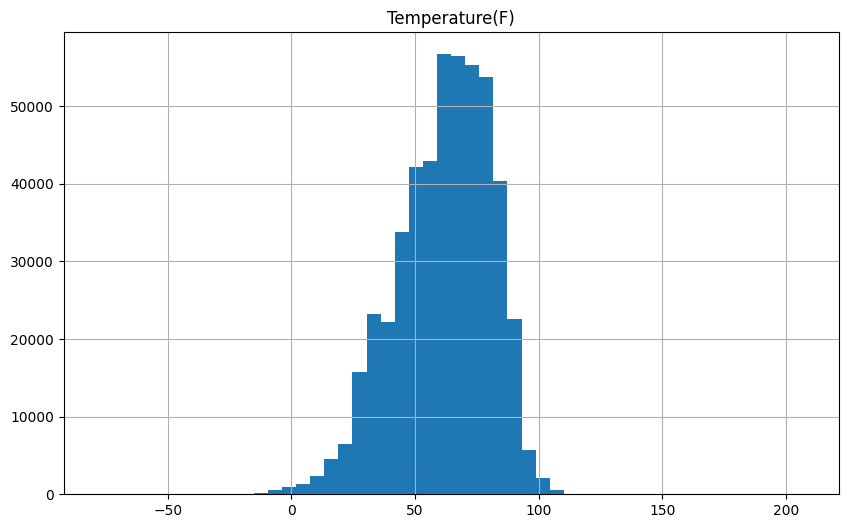

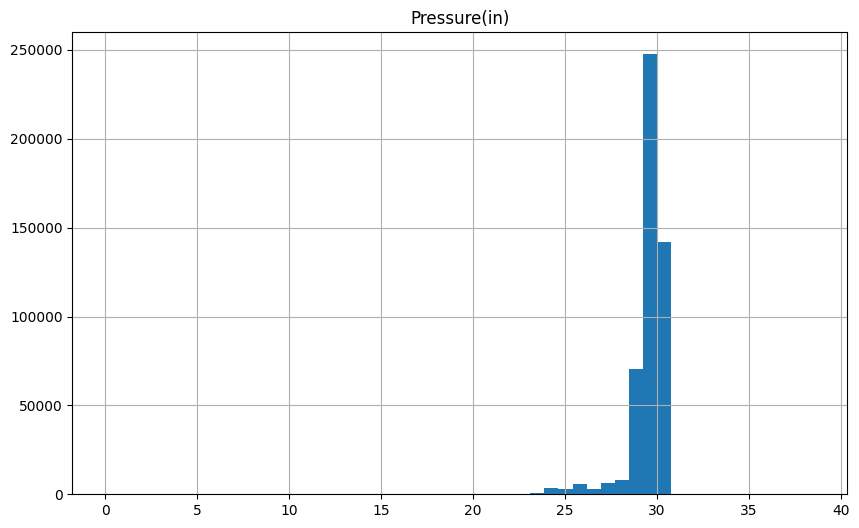

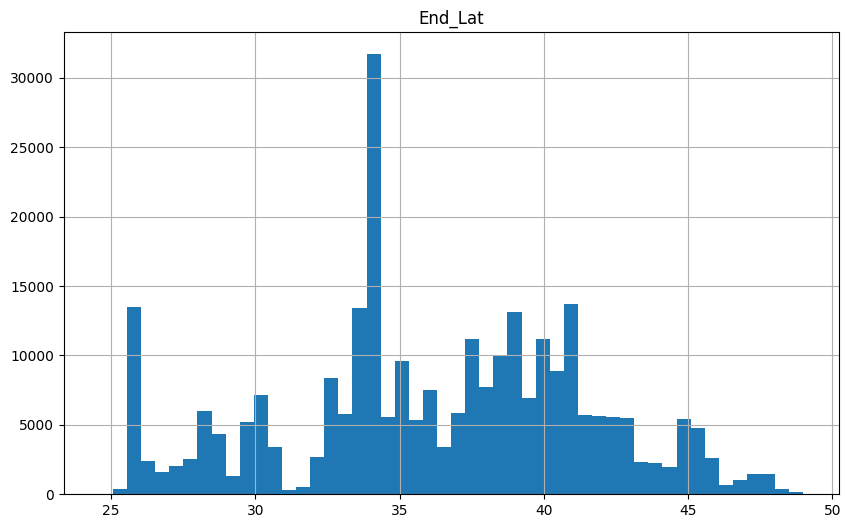

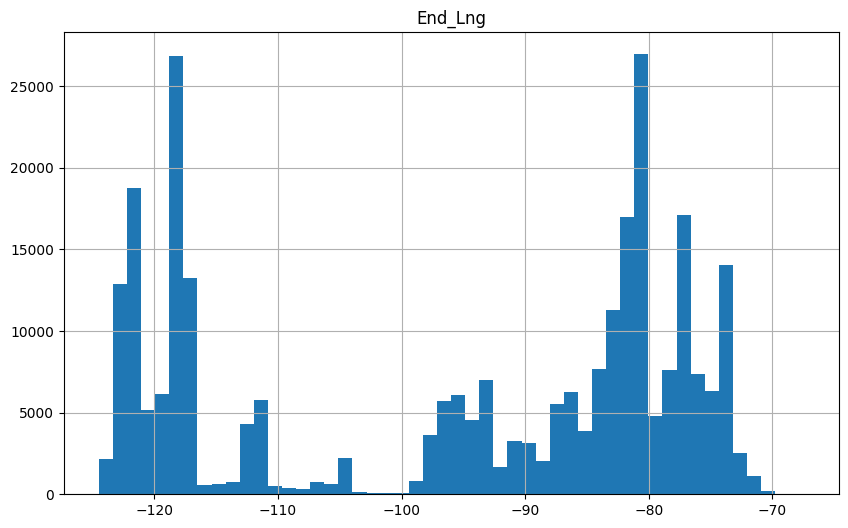

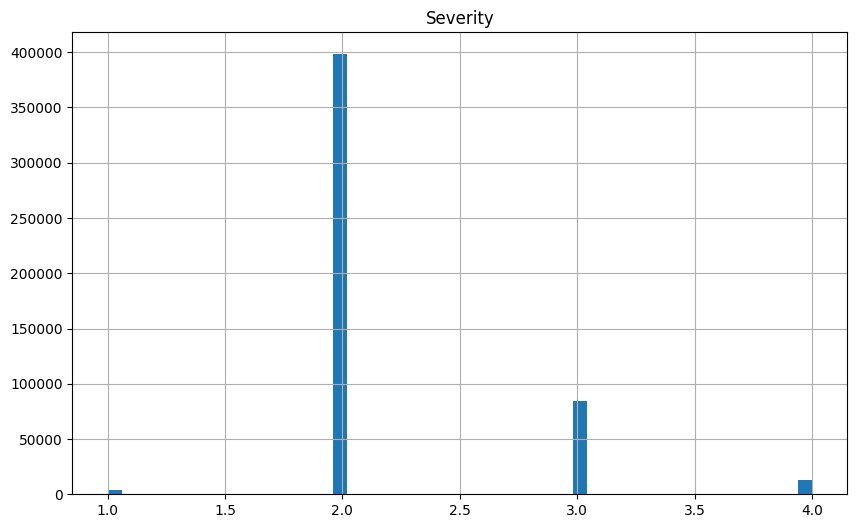

In [ ]:
columns = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)',
           'Visibility(mi)', 'Humidity(%)', 'Temperature(F)', 'Pressure(in)','End_Lat','End_Lng','Severity']
for column in columns:
    plt.figure(figsize=(10, 6))
    join_df[column].hist(bins=50)
    plt.title(column)
    plt.show()

In a right-skewed (positively skewed) dataset, there are indeed more data points on the right-hand side (higher values) and fewer data points on the left-hand side (lower values).The mean is typically higher than the median and mode in a right-skewed distribution. This means that the average value is pulled towards the higher end, where there are more data points, leading to a concentration of data on the right side.The formula for calculating the mean involves adding up all the values and then dividing by the total number of values. When there are larger values present, they contribute more to the sum, increasing the overall mean.Opposiste for left-skewed.



Precipitation (in): This distribution is highly skewed to the left(left-skewed), with most of the data concentrated at or near zero. This kind of distribution is common with precipitation data since many time periods report no precipitation. The median is definitely the preferred measure for imputation here, as the mean would be significantly influenced by the few large values.

Wind_Chill(F):left-skewed = Mean < Median.Mean would be significanlty influenced by the few large values.


In [ ]:
for i in ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)',
             'Visibility(mi)', 'Humidity(%)', 'Temperature(F)', 'Pressure(in)']:
    join_df[i].fillna(join_df[i].median(), inplace=True)


In [ ]:
correlation_lat = join_df['Start_Lat'].corr(join_df['End_Lat'])
correlation_lng = join_df['Start_Lng'].corr(join_df['End_Lng'])

print(f"Correlation between Start_Lat and End_Lat: {correlation_lat}")
print(f"Correlation between Start_Lng and End_Lng: {correlation_lng}")

Correlation between Start_Lat and End_Lat: 0.9999927451341307
Correlation between Start_Lng and End_Lng: 0.9999986922291678


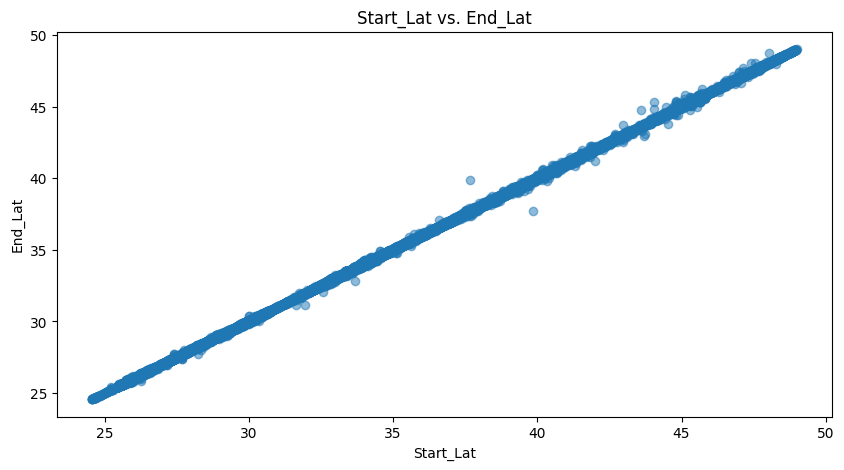

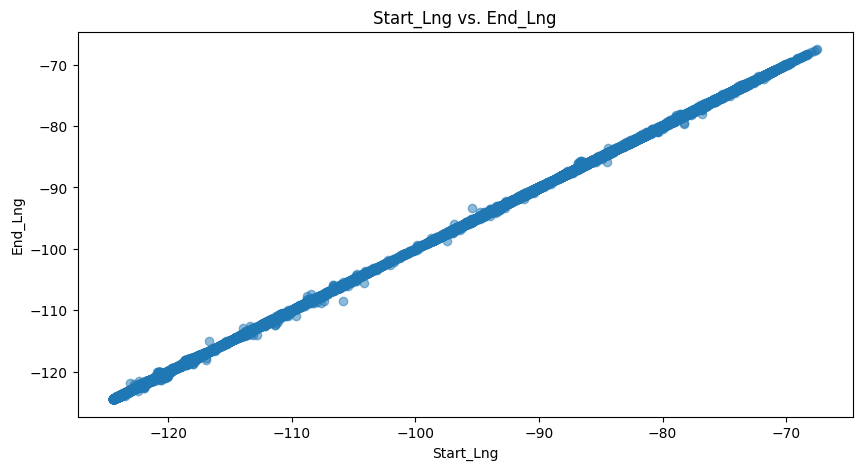

In [ ]:
# Plot for latitude
plt.figure(figsize=(10, 5))
plt.scatter(join_df['Start_Lat'], join_df['End_Lat'], alpha=0.5)
plt.title('Start_Lat vs. End_Lat')
plt.xlabel('Start_Lat')
plt.ylabel('End_Lat')
plt.show()

# Plot for longitude
plt.figure(figsize=(10, 5))
plt.scatter(join_df['Start_Lng'], join_df['End_Lng'], alpha=0.5)
plt.title('Start_Lng vs. End_Lng')
plt.xlabel('Start_Lng')
plt.ylabel('End_Lng')
plt.show()

Strong Correlation: Points are close to a straight line, either upward or downward sloping.

If the starting point of a journey moves north (increasing latitude), the ending point is also likely to be further north. Conversely, moving south (decreasing latitude) from the starting point would likely end in a southern location.

Latitude (Lat): Indicates how far north or south a point is from the Equator. It is measured in degrees, where 0° is at the Equator, positive values are to the north of the Equator (up to 90° at the North Pole), and negative values are to the south of the Equator (down to -90° at the South Pole).

Longitude (Lng): Indicates how far east or west a point is from the Prime Meridian, which is the zero-degree longitude line running through Greenwich, England. It is measured in degrees, where values can range from -180° to +180°.
East of the Prime Meridian has positive values, while west of the Prime Meridian has negative values.

In [ ]:
known_coords = join_df.dropna(subset=['End_Lat', 'End_Lng'])
known_tree = KDTree(known_coords[['Start_Lat', 'Start_Lng']])

def idw_estimate(points, known_tree, known_values, power=2):

    distances, indices = known_tree.query(points, k=5)  # k=5 for 5 nearest neighbors
    # Avoid division by zero in weights calculation
    distances[distances == 0] = 0.0001
    weights = 1 / np.power(distances, power)
    # Calculate weighted averages
    estimated_values = np.sum(weights * known_values[indices], axis=1) / np.sum(weights, axis=1)
    return estimated_values

# Select rows where End_Lat or End_Lng is missing
missing_end_lat = join_df['End_Lat'].isna()
missing_end_lng = join_df['End_Lng'].isna()

In [ ]:
# Estimate and fill missing End_Lat values
if missing_end_lat.any():
    estimated_lats = idw_estimate(join_df.loc[missing_end_lat, ['Start_Lat', 'Start_Lng']],
                                  known_tree,
                                  known_coords['End_Lat'].values)
    join_df.loc[missing_end_lat, 'End_Lat'] = estimated_lats

# Estimate and fill missing End_Lng values
if missing_end_lng.any():
    estimated_lngs = idw_estimate(join_df.loc[missing_end_lng, ['Start_Lat', 'Start_Lng']],
                                  known_tree,
                                  known_coords['End_Lng'].values)
    join_df.loc[missing_end_lng, 'End_Lng'] = estimated_lngs

In [ ]:
missing = (join_df.isna().sum().sort_values(ascending=False) /
                      len(join_df))[lambda x: x != 0]
missing

Wind_Direction           0.022394
Weather_Condition        0.022202
Weather_Timestamp        0.015348
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Civil_Twilight           0.002966
Nautical_Twilight        0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
dtype: float64

In [ ]:
# Option 1: Drop missing values (not recommended without further analysis)
# It removes any row from the DataFrame that contains at least one missing value (NaN) in any column
# df.dropna(inplace=True)

In [ ]:
join_df.isna().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  1
Street                     691
City                        19
County                       0
State                        0
Zipcode                    116
Country                      0
Timezone                   507
Airport_Code              1446
Weather_Timestamp         7674
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           11197
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        11101
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [ ]:
join_df.shape[0]

500000

In [ ]:
#join_df[""].value_counts()

In [ ]:
county_state_severity = join_df.groupby(['County', 'State'])['Severity'].mean().reset_index()

accident_counts = join_df.groupby(['County', 'State']).size().reset_index(name='Accident_Count')

print(county_state_severity)
print(accident_counts)

         County State  Severity
0     Abbeville    SC  1.986301
1        Acadia    LA  2.750000
2      Accomack    VA  2.290323
3           Ada    ID  2.016129
4         Adair    IA  2.217391
...         ...   ...       ...
2547       York    SC  2.127182
2548       York    VA  2.400000
2549       Yuba    CA  2.019481
2550       Yuma    AZ  2.489796
2551       Yuma    CO  3.000000

[2552 rows x 3 columns]
         County State  Accident_Count
0     Abbeville    SC              73
1        Acadia    LA              20
2      Accomack    VA              31
3           Ada    ID             372
4         Adair    IA              23
...         ...   ...             ...
2547       York    SC             802
2548       York    VA             145
2549       Yuba    CA             308
2550       Yuma    AZ              49
2551       Yuma    CO               4

[2552 rows x 3 columns]


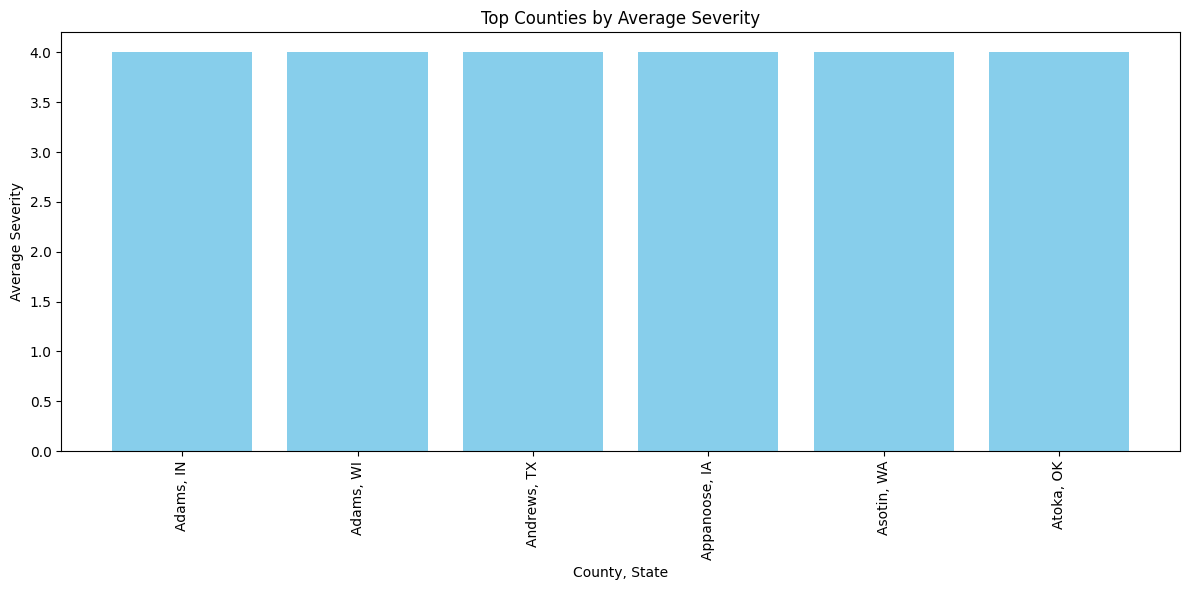

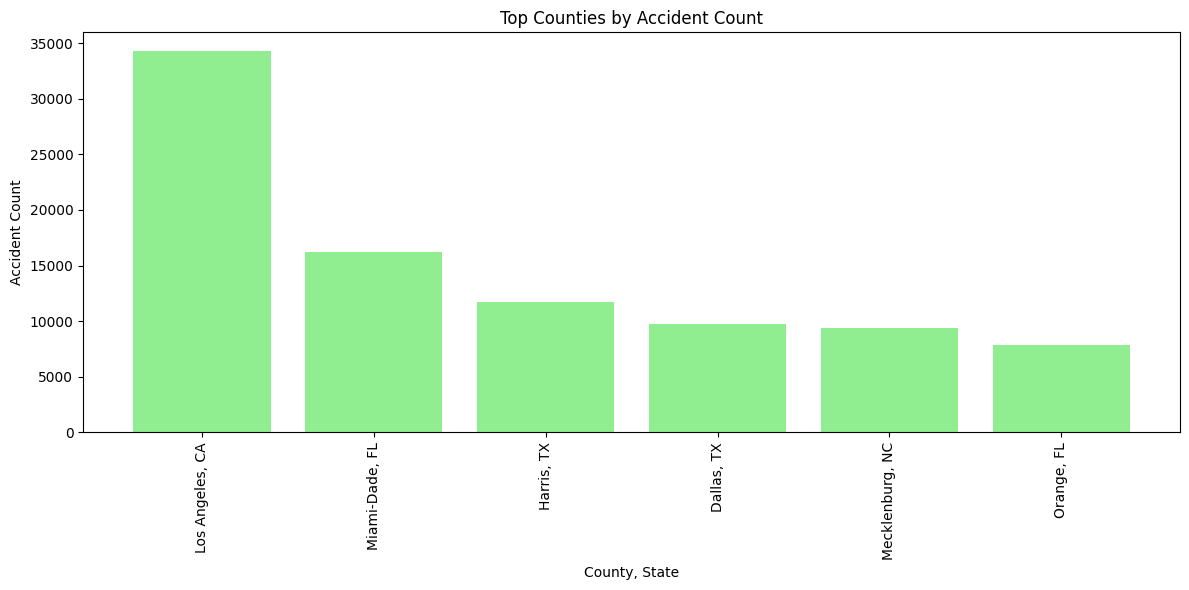

In [ ]:
top_county_state_severity = county_state_severity.nlargest(6, 'Severity')
top_accident_counts = accident_counts.nlargest(6, 'Accident_Count')

# Plot average severity by county and state for the top rows
plt.figure(figsize=(12, 6))
plt.bar(top_county_state_severity['County'] + ', ' + top_county_state_severity['State'],
        top_county_state_severity['Severity'],
        color='skyblue')
plt.xlabel('County, State')
plt.ylabel('Average Severity')
plt.title('Top Counties by Average Severity')
plt.xticks(rotation=90)  #
plt.tight_layout()
plt.show()

# Plot total accident counts by county and state for the top rows
plt.figure(figsize=(12, 6))
plt.bar(top_accident_counts['County'] + ', ' + top_accident_counts['State'],
        top_accident_counts['Accident_Count'],
        color='lightgreen')
plt.xlabel('County, State')
plt.ylabel('Accident Count')
plt.title('Top Counties by Accident Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

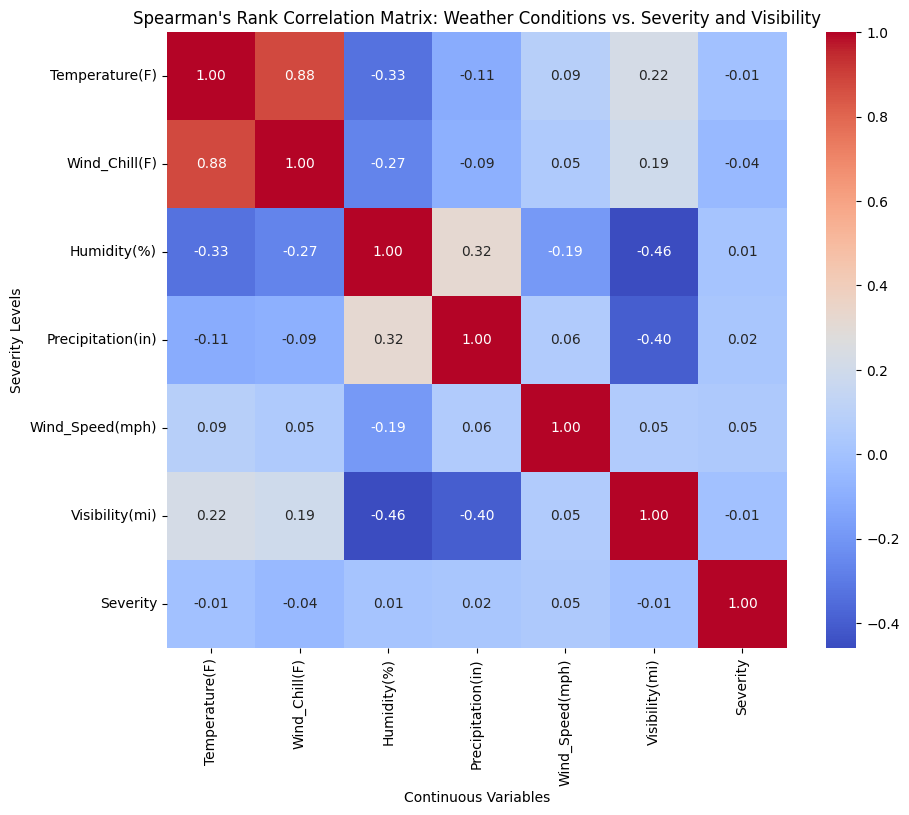

In [ ]:
weather_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Precipitation(in)','Wind_Speed(mph)','Visibility(mi)', 'Severity']
weather_df = join_df[weather_columns]

correlation_matrix_spearman = weather_df.corr(method='spearman')

# Create the heatmap for Spearman's rank correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman's Rank Correlation Matrix: Weather Conditions vs. Severity and Visibility")
plt.xlabel('Continuous Variables')
plt.ylabel('Severity Levels')
plt.show()

if you want to use Spearman's rank correlation coefficient with both continuous and categorical variables like above example, you only need to convert the continuous variable into ranks. This process involves assigning ranks to the values of the continuous variable, from smallest to largest or vice versa. Once the continuous variable is ranked, you can compute Spearman's correlation between the ranked continuous variable and the categorical variable. This approach is suitable when the relationship between the variables is expected to be monotonic rather than strictly linear. Pearson correlation uses the raw data values to compute the correlation coefficient. It is sensitive to outliers and non-linear relationships and its assuming a bivariate normal distribution or a roughly bell-shaped distribution which were not the case for the above variables.Pearson correlation is more robust and reliable when data follow a normal distribution because extreme values are less likely to occur and have less impact on the correlation coefficient.More oulier, lower pearson coefficient.Spearman's correlation is less sensitive to outliers and non-linear relationships because it focuses on the order or ranking of the data rather than the exact values

FYI:

Linear: If the relationship is both monotonic and linear, the rate of change between the variables is constant. For example, if you were looking at the relationship between the number of hours studied and test scores, a linear monotonic relationship would suggest that scores increase by a consistent amount for each additional hour spent studying.

Non-linear: If the relationship is monotonic but non-linear, the variables still move in the same direction but not at a constant rate of change. For example, initially, as the hours spent studying increase, test scores might increase sharply, but after a certain point, additional study hours lead to smaller improvements in test scores.

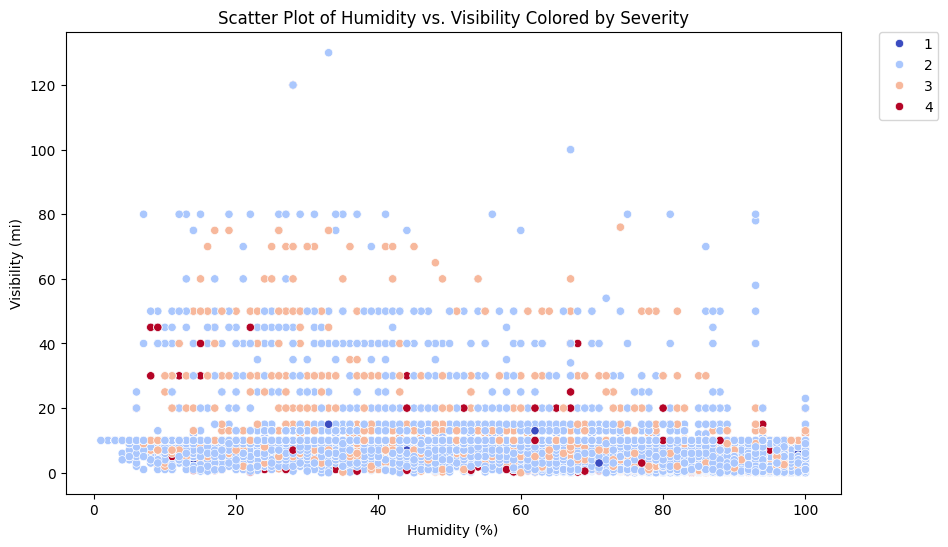

In [ ]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(data=join_df, x='Humidity(%)', y='Visibility(mi)', hue='Severity', palette='coolwarm', legend='full')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Scatter Plot of Humidity vs. Visibility Colored by Severity')
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (mi)')
plt.show()

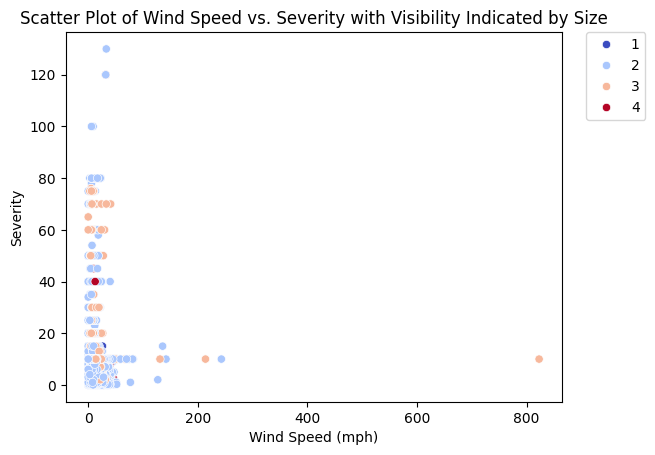

In [ ]:
scatter = sns.scatterplot(data=join_df, x='Wind_Speed(mph)', y='Visibility(mi)', hue='Severity', palette='coolwarm', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Scatter Plot of Wind Speed vs. Severity with Visibility Indicated by Size')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Severity')
plt.show()

 It seems that as humidity increases, visibility does not show a straightforward decrease or increase, suggesting that other factors might be at play in affecting visibility. The color coding indicates the severity of the incidents, but there does not appear to be a clear pattern where higher or lower humidity correlates with more severe incidents.

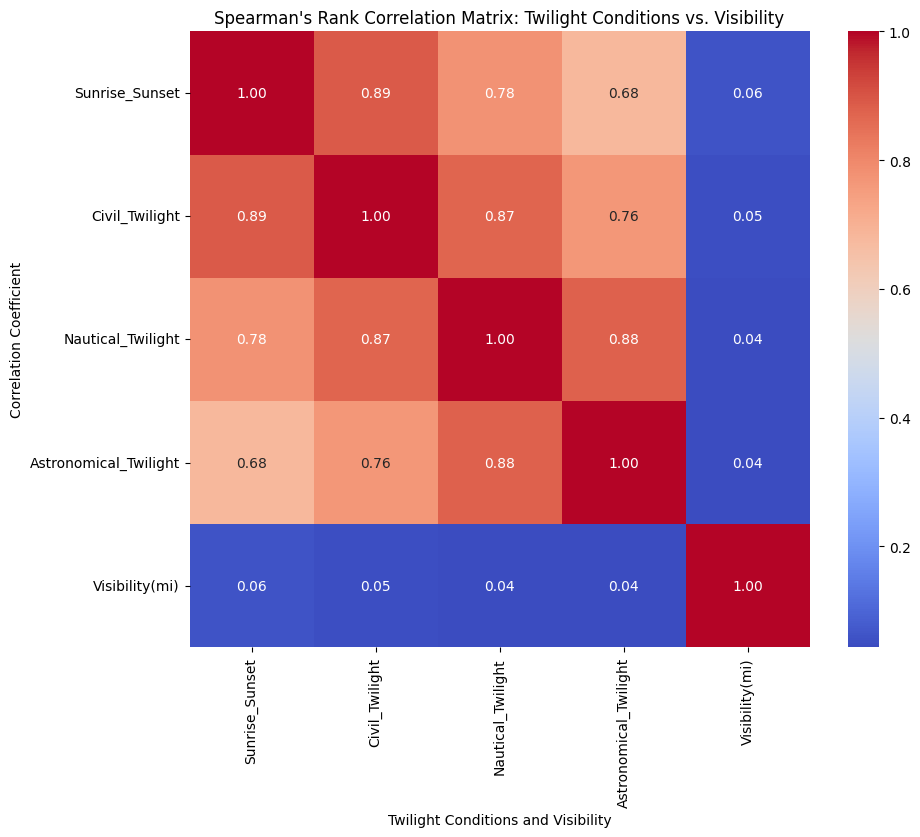

In [ ]:
# This is binary encoding where Day=1 and Night=0.
join_df['Civil_Twilight'] = join_df['Civil_Twilight'].map({'Day': 1, 'Night': 0})
join_df['Nautical_Twilight'] = join_df['Nautical_Twilight'].map({'Day': 1, 'Night': 0})
join_df['Astronomical_Twilight'] = join_df['Astronomical_Twilight'].map({'Day': 1, 'Night': 0})
join_df['Sunrise_Sunset'] = join_df['Sunrise_Sunset'].map({'Day': 1, 'Night': 0})
# New DataFrame with just the columns we're interested in.
twilight_visibility_df = join_df[['Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Visibility(mi)']]

correlation_matrix_spearman = twilight_visibility_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman's Rank Correlation Matrix: Twilight Conditions vs. Visibility")
plt.xlabel('Twilight Conditions and Visibility')
plt.ylabel('Correlation Coefficient')
plt.show()

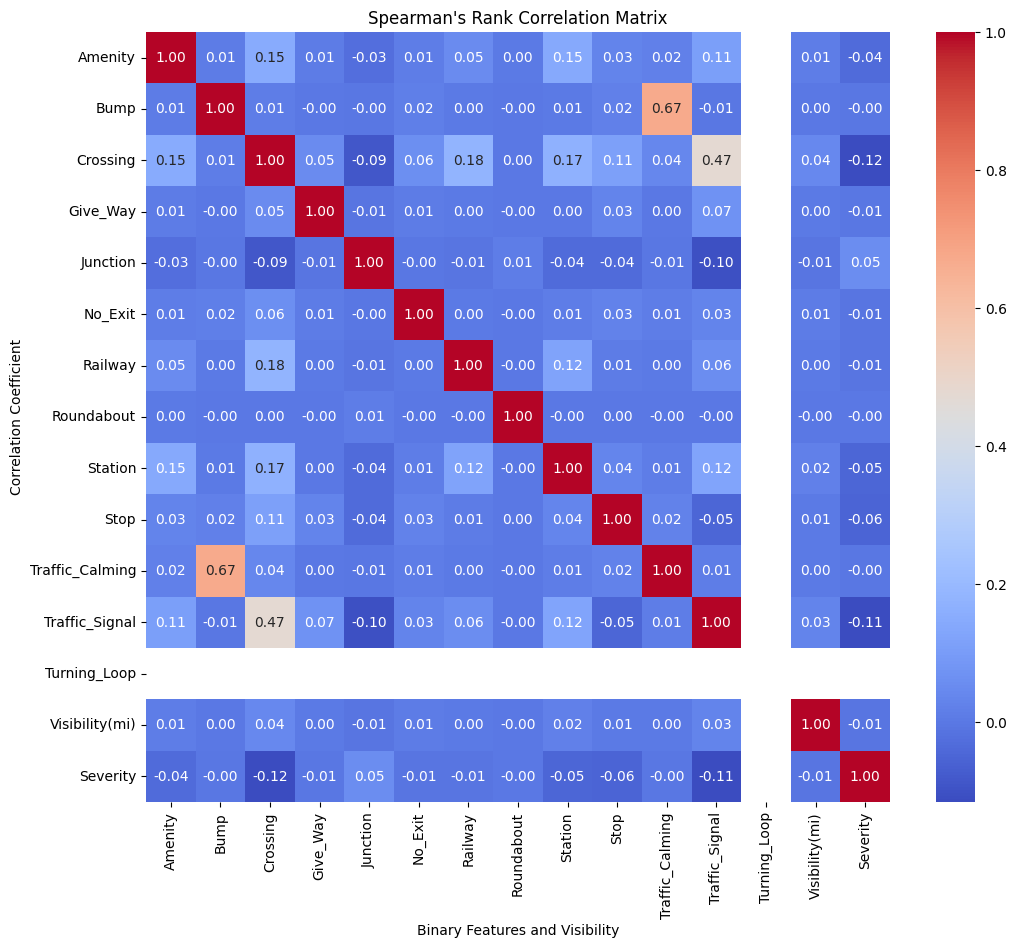

In [ ]:
# New DataFrame with just the columns we're interested in for binary features.
binary_features_df = join_df[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                              'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                              'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                              'Visibility(mi)','Severity']]

# Calculate Spearman's rank correlation matrix
correlation_matrix_spearman_binary = binary_features_df.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_spearman_binary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman's Rank Correlation Matrix")
plt.xlabel('Binary Features and Visibility')
plt.ylabel('Correlation Coefficient')
plt.show()


Measures of visibility don’t vary significantly with the twilight conditions.

In [ ]:
# Filter data for severity level 4
severity_4_data = join_df[join_df['Severity'] == 4]

# Find streets with severity level 4 and their severity
street_severity_4 = severity_4_data[['Street', 'Severity']]

# Print the streets with severity level 4 and their severity
print("Streets with severity level 4 and their severity:")
print(street_severity_4)

Streets with severity level 4 and their severity:
                   Street  Severity
91         City Island Rd         4
152              MD-100 W         4
165                I-25 N         4
175        Dolphin Expy E         4
197              US-290 W         4
...                   ...       ...
499822   Harrison City Rd         4
499890      Courthouse Rd         4
499899      Priestford Rd         4
499920    Springfield Ave         4
499972    W State Road 66         4

[13064 rows x 2 columns]


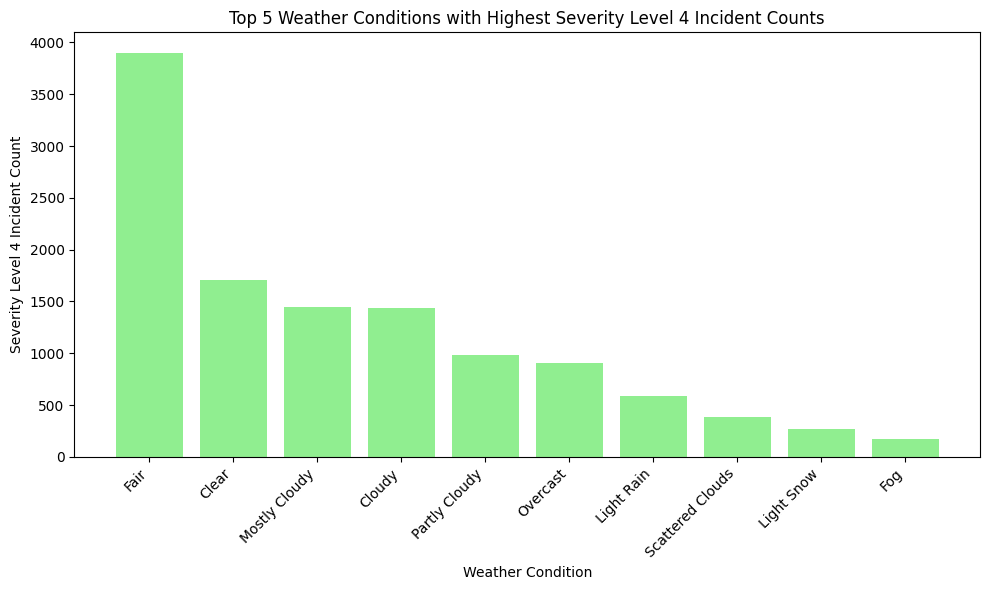

In [ ]:
# Filter data for severity level 4 incidents
severity_4_data = join_df[join_df['Severity'] == 4]

# Group by weather conditions and calculate severity metrics
weather_conditions_count = severity_4_data.groupby('Weather_Condition').size().reset_index(name='Severity_4_Count')

# Sort by severity level 4 incident counts to find the top 5 weather conditions
top_weather_conditions = weather_conditions_count.nlargest(10, 'Severity_4_Count')

# Visualize severity level 4 incident counts for the top 5 weather conditions
plt.figure(figsize=(10, 6))
plt.bar(top_weather_conditions['Weather_Condition'], top_weather_conditions['Severity_4_Count'], color='lightgreen')
plt.xlabel('Weather Condition')
plt.ylabel('Severity Level 4 Incident Count')
plt.title('Top 5 Weather Conditions with Highest Severity Level 4 Incident Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

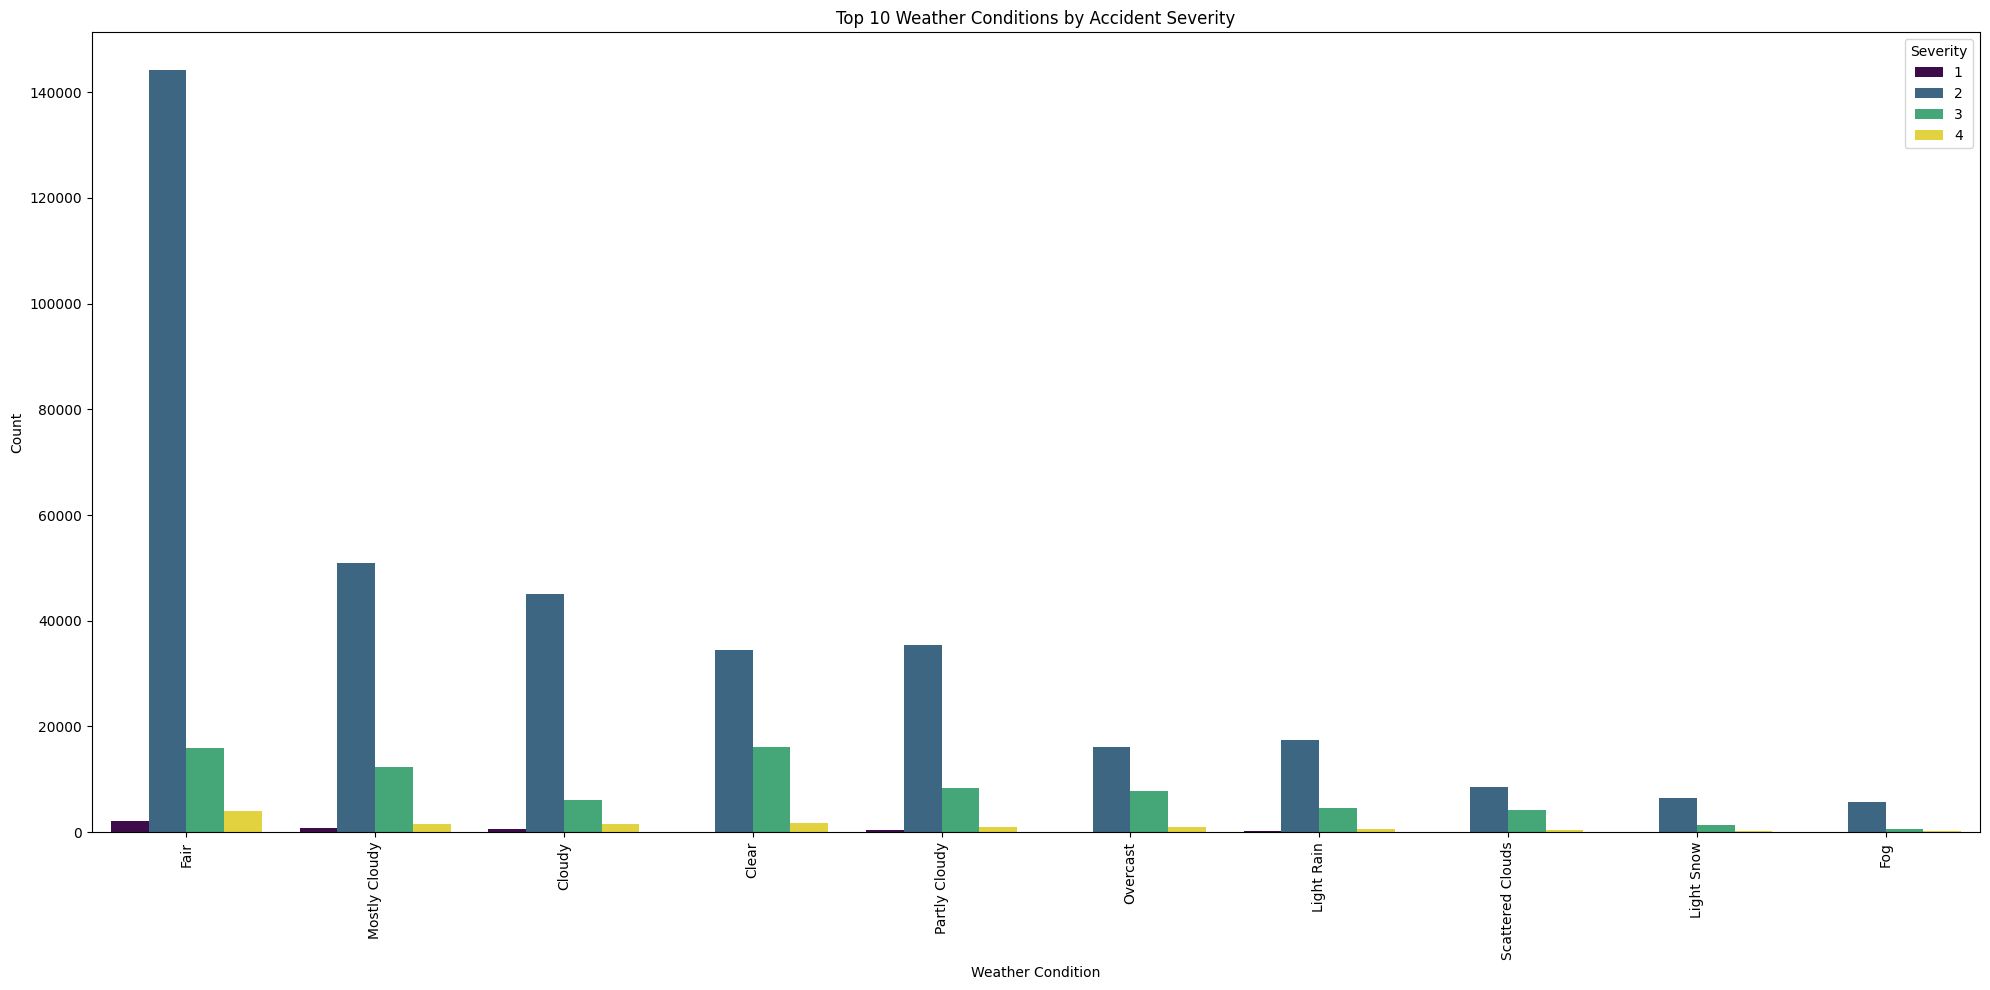

In [ ]:
# Calculate the count of accidents for each weather condition
weather_counts = join_df['Weather_Condition'].value_counts()

# Select the top 10 weather conditions
top_weather_conditions = weather_counts.head(10).index

# Filter the DataFrame to include only the top 10 weather conditions
top_weather_df = join_df[join_df['Weather_Condition'].isin(top_weather_conditions)]

plt.figure(figsize=(20,10))
sns.countplot(data=top_weather_df, x='Weather_Condition', hue='Severity', order=top_weather_conditions, palette='viridis')
plt.title('Top 10 Weather Conditions by Accident Severity')
plt.xticks(rotation=90)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                    'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
                    'Nautical_Twilight', 'Astronomical_Twilight']

join_df_categorical = join_df[categorical_cols]

# Apply one-hot encoding to the filtered DataFrame
join_df_encoded = pd.get_dummies(join_df_categorical, drop_first=True)

# Add 'Severity' column back to the encoded DataFrame
join_df_encoded['Severity'] = join_df['Severity']

# Calculate chi-square statistics for each categorical variable against Severity
chi2_stats = []
for col in join_df_encoded.columns:
    if col != 'Severity':
        contingency_table = pd.crosstab(join_df_encoded[col], join_df_encoded['Severity'])
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        chi2_stats.append({'Column': col, 'Chi2': chi2, 'P-value': p_val})

chi2_df = pd.DataFrame(chi2_stats)

chi2_df_sorted = chi2_df.sort_values(by='P-value', ascending=False) # hight to low

print(chi2_df_sorted)

                   Column         Chi2        P-value
12           Turning_Loop     0.000000   1.000000e+00
7              Roundabout     3.325920   3.440513e-01
1                    Bump     8.286363   4.044974e-02
10        Traffic_Calming    14.820731   1.976436e-03
3                Give_Way    45.616259   6.843538e-10
5                 No_Exit    72.620214   1.172333e-15
6                 Railway    75.674707   2.597113e-16
0                 Amenity   722.772414  2.421056e-156
8                 Station  1229.778434  2.536369e-266
13         Sunrise_Sunset  1251.301579  5.423533e-271
9                    Stop  1814.305683   0.000000e+00
4                Junction  1472.431277   0.000000e+00
11         Traffic_Signal  7278.664780   0.000000e+00
2                Crossing  7177.245262   0.000000e+00
14         Civil_Twilight  1528.946004   0.000000e+00
15      Nautical_Twilight  1803.150852   0.000000e+00
16  Astronomical_Twilight  1947.874940   0.000000e+00


https://www.youtube.com/watch?v=qYOMO83Z1WU best video to learn chi test
chi-square test is typically used to determine the relationship between two categorical variables.

Severity is being treated as a categorical variable (even if it's numeric, such as 1, 2, 3, 4 representing different levels of severity), you can directly use the chi-square test to assess the association between Severity and other categorical variables. This approach is valid if the numeric values in the Severity column represent distinct, non-ordered categories.For example, if Severity levels 1, 2, 3, and 4 represent different, distinct categories (like mild, moderate, severe, critical).


The null hypothesis, which would claim there is no relationship, is therefore rejected in favor of the alternative hypothesis that there is a very strong relationship between Traffic_Signal column with Severity(most correlated categorical)


Therefore, you can conclude that these variables (Stop, Traffic_Signal, Junction, Crossing, Civil_Twilight_Night, Nautical_Twilight_Night, and Astronomical_Twilight_Night) are significantly associated with the Severity.


From high to low orderd them:

Traffic_Signal: Chi-square = 7278.664780
Crossing: Chi-square = 7177.245262
Astronomical_Twilight_Night: Chi-square = 1889.882495
Stop: Chi-square = 1814.305683
Nautical_Twilight_Night: Chi-square = 1740.441285
Junction: Chi-square = 1472.431277
Civil_Twilight_Night: Chi-square = 1466.179687


FYI:
Turning_Loop: A Chi-square value of 0 and a p-value of 1.00 indicate there's no observed difference between expected and observed frequencies; thus, there's no evidence of association with the outcome variable.

Roundabout: A Chi-square value of approximately 3.33 with a p-value of 0.344 suggests no statistically significant association at the typical alpha level of 0.05.

Bump: A Chi-square value of approximately 8.29 with a p-value of 0.040 indicates a potential statistically significant association since the p-value is just below the 0.05 threshold.

below Bump we have strong association with the outcome variable.


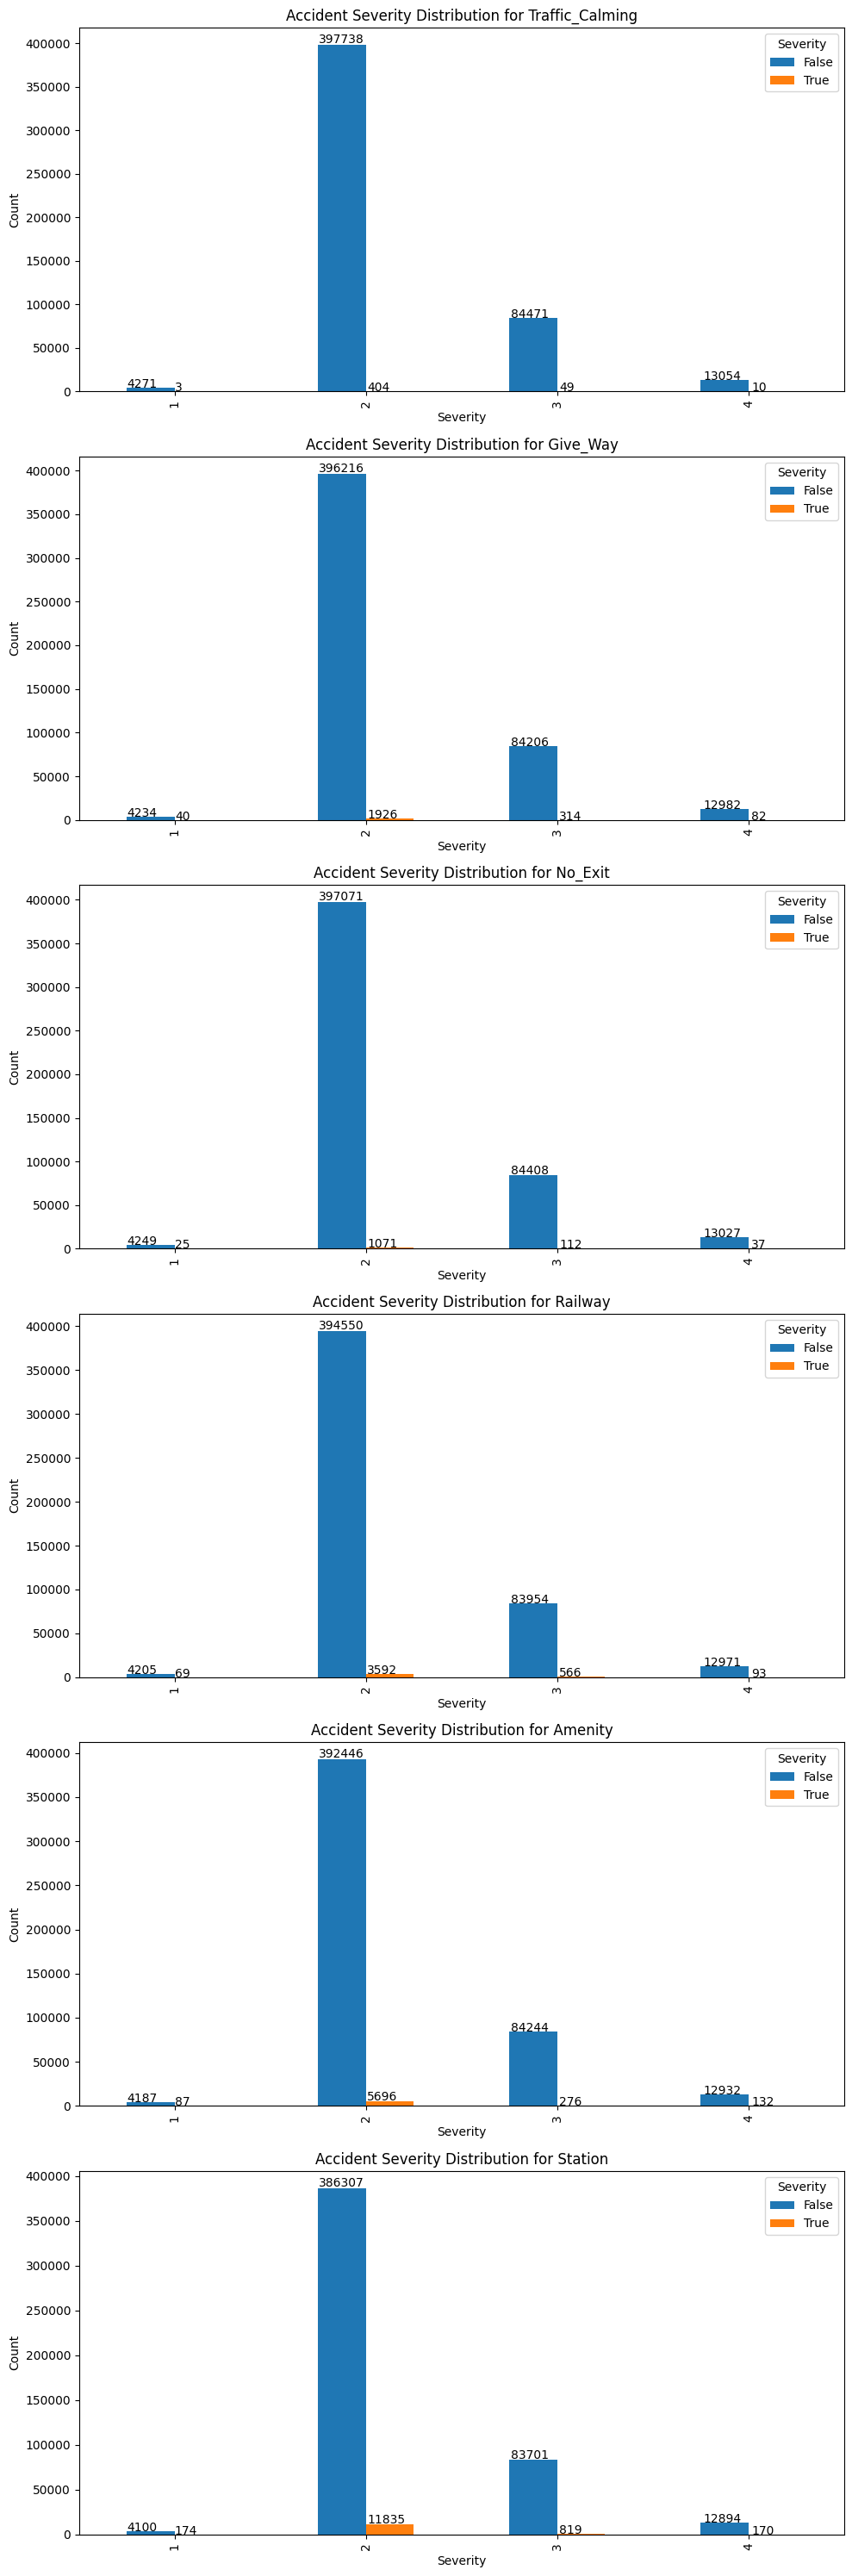

In [ ]:
columns_to_plot = ['Traffic_Calming', 'Give_Way', 'No_Exit', 'Railway', 'Amenity', 'Station']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    # Group by the column and 'Severity', then count the occurrences
    data = join_df.groupby([column, 'Severity']).size().unstack(level=0)

    # Plot the bar chart for 'True' and 'False' responses in each severity level
    ax = data.plot(kind='bar', ax=axes[i], stacked=False)

    # Add the text annotations
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    axes[i].set_title(f'Accident Severity Distribution for {column}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Severity')

plt.tight_layout()
plt.show()

There's a visible difference in the counts of severity levels between 'True' (feature present) and 'False' (feature absent) scenarios. However, since 'False' responses overwhelmingly dominate the data, it may be challenging to conclude the direct impact of these traffic features on accident severity which could affect the reliability of any statistical significance tests or predictive models. This suggests the need for careful consideration of data sampling or weighting methods in further analysis.

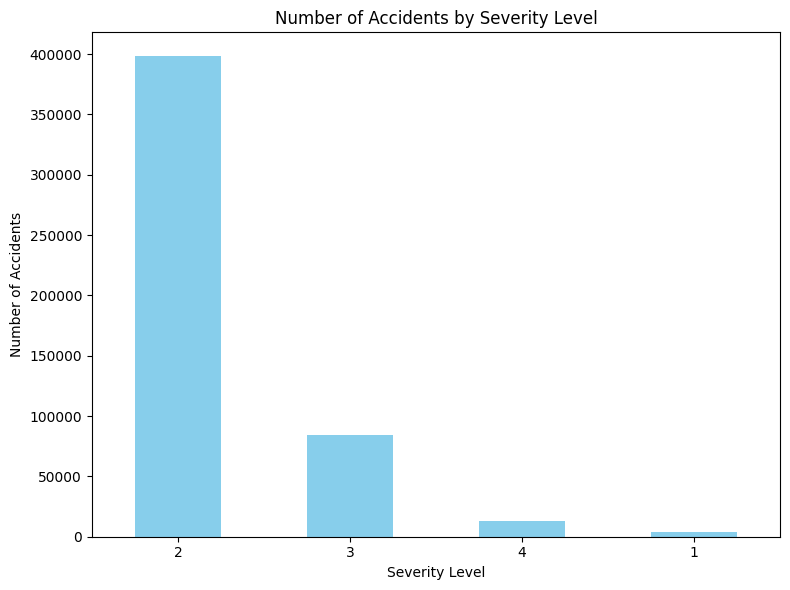

In [ ]:
# Count the occurrences of each severity level
severity_counts = join_df['Severity'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


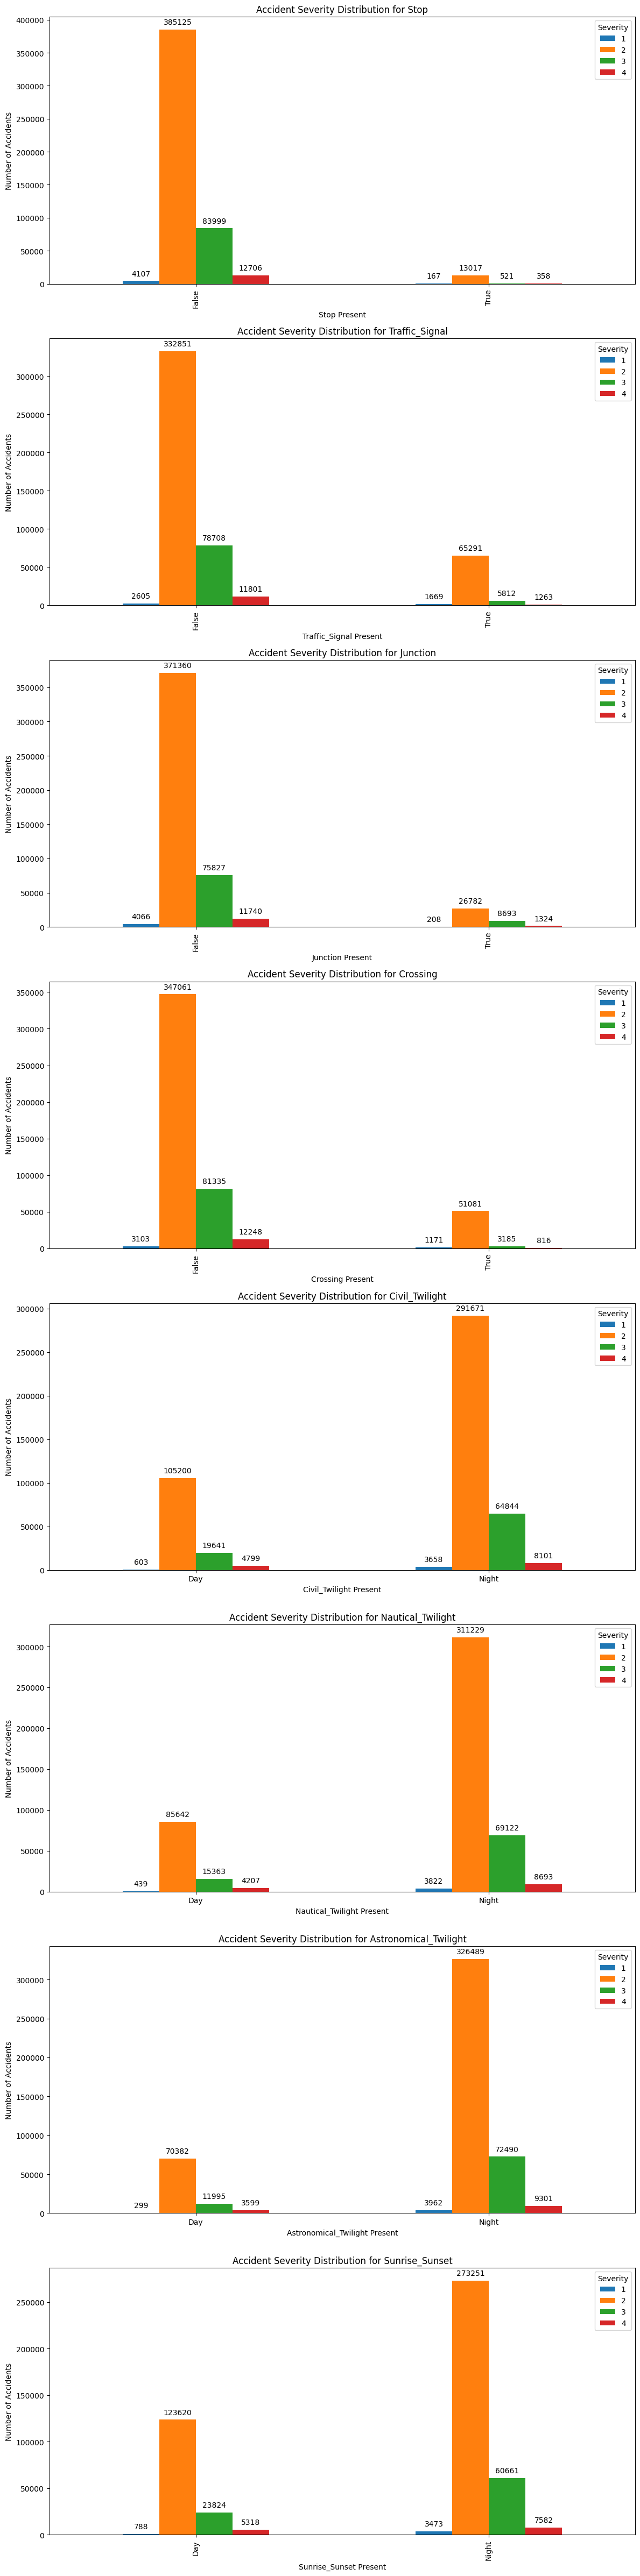

In [ ]:
feature_columns = ['Stop', 'Traffic_Signal', 'Junction', 'Crossing',
                   'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Sunrise_Sunset']

# Map numeric values to labels for the twilight columns
twilight_mapping = {
    0: 'Day',
    1: 'Night'
}

# Prepare the figure for plotting
fig, axs = plt.subplots(len(feature_columns), figsize=(12, 6 * len(feature_columns)))

for ax, feature in zip(axs, feature_columns):
    # Group by feature and 'Severity', then count the occurrences
    # Exclude NaN values specifically for the twilight columns
    if feature in ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Sunrise_Sunset']:
        counts = join_df[join_df[feature].notna()].groupby([feature, 'Severity']).size().unstack(level='Severity', fill_value=0)
        # Map numeric values to labels
        counts.index = counts.index.map(twilight_mapping)
    else:
        counts = join_df.groupby([feature, 'Severity']).size().unstack(level='Severity', fill_value=0)

    # Plot the bar chart
    counts.plot(kind='bar', stacked=False, ax=ax, title=f"Accident Severity Distribution for {feature}")

    # Set the x-axis label as 'Day' or 'Night' for the twilight columns
    if feature in ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']:
        # The categories should be present from the groupby operation
        ax.set_xticklabels(counts.index, rotation=0)

    # Labeling
    ax.set_xlabel(f"{feature} Present")
    ax.set_ylabel("Number of Accidents")
    ax.legend(title='Severity')

    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate if there is a height (count) to display
            ax.annotate(f'{height:.0f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

 Key patterns from the bar charts that are important to highlight:



1. Severity 2 accidents are the most prevalent across all features, indicating that the majority of accidents are of moderate severity.
2. The absence of stop signs, traffic signals, junctions and crossings correlates with a higher number of accidents.
3. The presence of stop signs is associated with a lower number of accidents overall, suggesting that this features play a role in reducing accident occurrences. Notably, the severity of accidents also tends to decrease in the presence of this traffic control features comapre with other metric.
4. Twilight Conditions,for daytime (True): The number of accidents across all severity levels is less than during the night.(from civil to nautical to astronomical twilight during nighttime)
From day to night (Transition): Diminishing light might lead to more accidents (all level).Accidents that do occur at night might be more severe, possibly due to lower visibility or other factors
5. It is evident that a significant number of accidents occur during nighttime, as indicated by the 'Sunrise_Sunset' column showing 'Night'.
6. The data suggests that locations without stop signs or crossings have higher number of severe(3,4 level) accidents.






In [ ]:
join_df['Start_Time'] = pd.to_datetime(join_df['Start_Time'], errors='coerce')

In [ ]:
join_df['Month'] = join_df['Start_Time'].dt.month_name()
join_df['Year'] = join_df['Start_Time'].dt.year
join_df['Hour'] = join_df['Start_Time'].dt.hour
join_df['Weekday'] = join_df['Start_Time'].dt.weekday

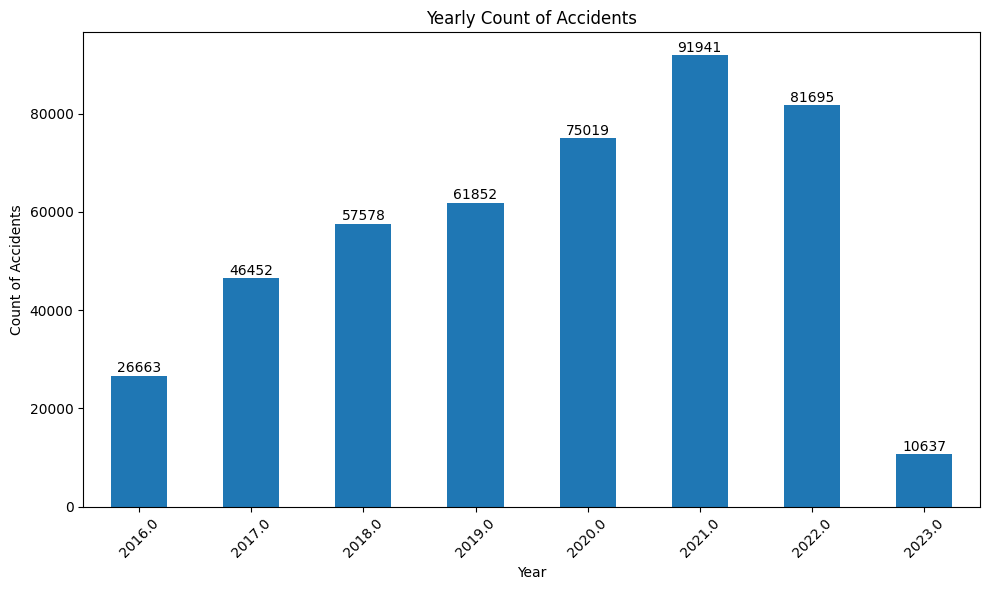

In [ ]:
accidents_per_year = join_df.groupby('Year').size()

# Create a bar chart for the accidents per year
plt.figure(figsize=(10, 6))
ax = accidents_per_year.plot(kind='bar')
plt.title('Yearly Count of Accidents')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)  # Rotate the x labels to make them more readable

# Annotate each bar with its count
for i, v in enumerate(accidents_per_year):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust the layout to make room for the x labels
plt.show()

In [ ]:
monthly_counts_2023 = join_df[join_df['Year'] == 2023]['Month'].value_counts().sort_index()

Text(0, 0.5, 'Count of Accidents')

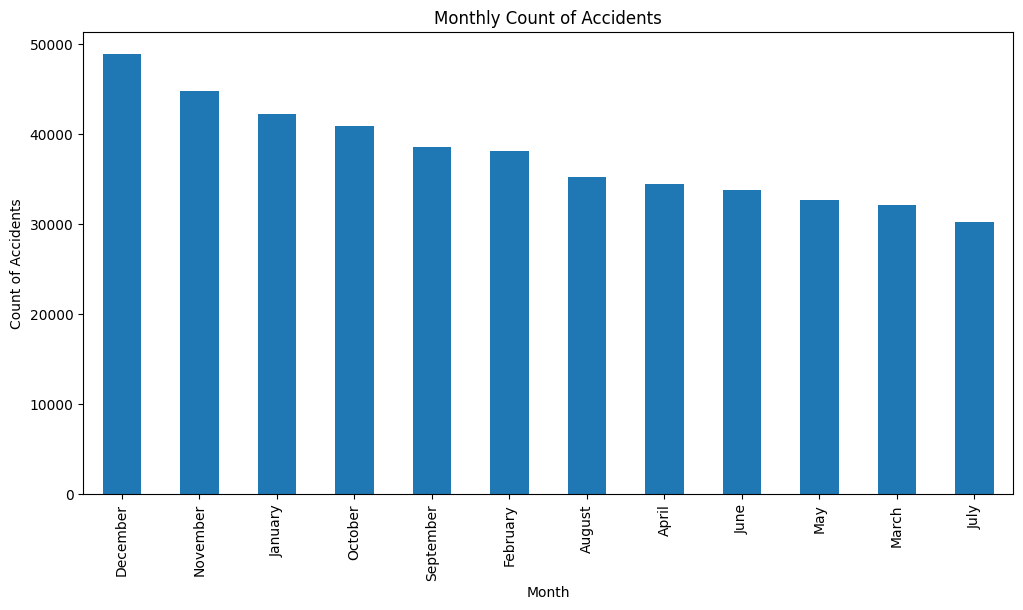

In [ ]:
accidents_per_month = join_df.groupby('Month').size()

# Sort accidents_per_month in descending order
accidents_per_month_sorted = accidents_per_month.sort_values(ascending=False)

# Create a bar chart for the sorted accidents per month
plt.figure(figsize=(12, 6))
ax = accidents_per_month_sorted.plot(kind='bar')
plt.title('Monthly Count of Accidents')
plt.xlabel('Month')
plt.ylabel('Count of Accidents')

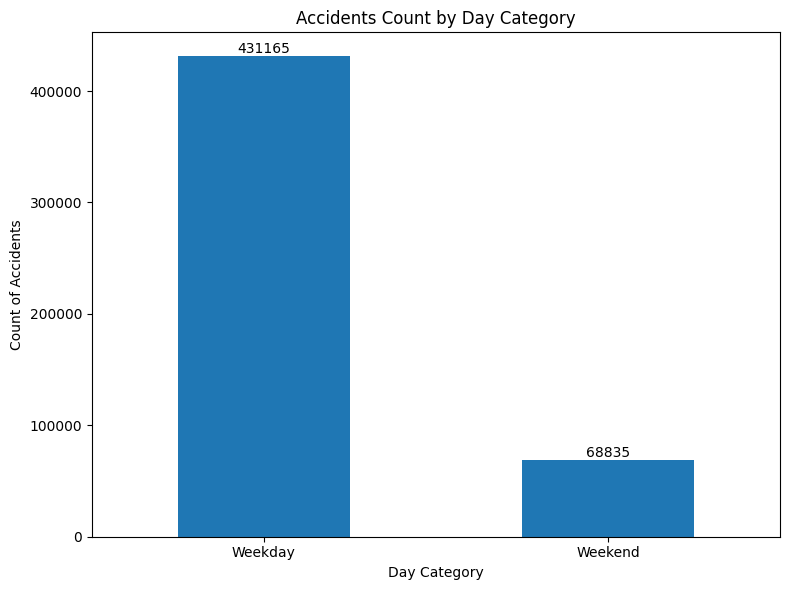

In [ ]:
join_df['Weekday'] = join_df['Start_Time'].dt.day_name()

# Define a function to categorize weekdays and weekends
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the categorization function to create a new 'DayCategory' column
join_df['DayCategory'] = join_df['Weekday'].apply(categorize_day)

# Calculate accidents per day category
accidents_per_day_category = join_df.groupby('DayCategory').size()

# Create a bar chart for accidents per day category
plt.figure(figsize=(8, 6))
ax = accidents_per_day_category.plot(kind='bar')
plt.title('Accidents Count by Day Category')
plt.xlabel('Day Category')
plt.ylabel('Count of Accidents')

# Annotate each bar with its count
for i, v in enumerate(accidents_per_day_category):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Rotate the x labels if needed
plt.tight_layout()
plt.show()

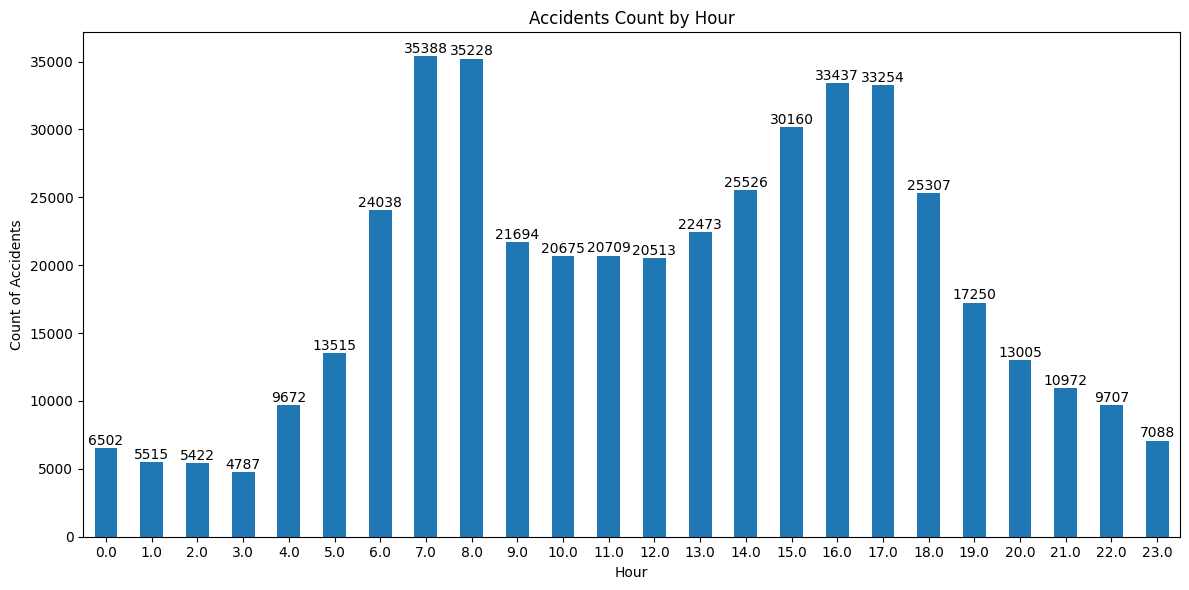

In [ ]:
accidents_per_hour = join_df.groupby('Hour').size()

# Create a bar chart for accidents per hour
plt.figure(figsize=(12, 6))
ax = accidents_per_hour.plot(kind='bar')
plt.title('Accidents Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Accidents')

# Annotate each bar with its count
for i, v in enumerate(accidents_per_hour):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Rotate the x labels if needed
plt.tight_layout()
plt.show()

In [ ]:
columns_to_remove = ['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
                     'Distance(mi)', 'Description','ID', 'Source', 'Zipcode', 'Weather_Timestamp','Airport_Code','Timezone']

join_df_cleaned = join_df.drop(columns=columns_to_remove)

# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
join_df_encoded = join_df_cleaned.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

X = join_df_encoded.drop(columns=['Severity'])  # Features
y = join_df_encoded['Severity']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features influencing severity levels
print(importance_df.head(10))

           Feature  Importance
0           Street    0.151707
32            Year    0.073207
8     Pressure(in)    0.070005
1             City    0.066720
2           County    0.065087
7      Humidity(%)    0.059998
5   Temperature(F)    0.059110
3            State    0.057068
33            Hour    0.051564
31           Month    0.047200


In [50]:
lemmatizer = WordNetLemmatizer()

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to deeply clean and preprocess the text using lemmatization
def deep_clean_text_lemmatization(text):
    # Convert to string in case it's not
    text = str(text)

    text = text.lower()
    # Remove numbers and special characters
    text = re.sub(r'[\d\W]+', ' ', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Get POS tags for words
    nltk_pos_tagged = nltk.pos_tag(words)
    # Map nltk POS tags to wordnet tags
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_pos_tagged)
    # Perform lemmatization
    lemmatized_words = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # If no tag, consider it as a noun
            lemmatized_words.append(lemmatizer.lemmatize(word))
        else:
            lemmatized_words.append(lemmatizer.lemmatize(word, tag))
    return ' '.join(lemmatized_words)

In [51]:
sample_processed = join_df['Description'].astype(str).apply(deep_clean_text_lemmatization)

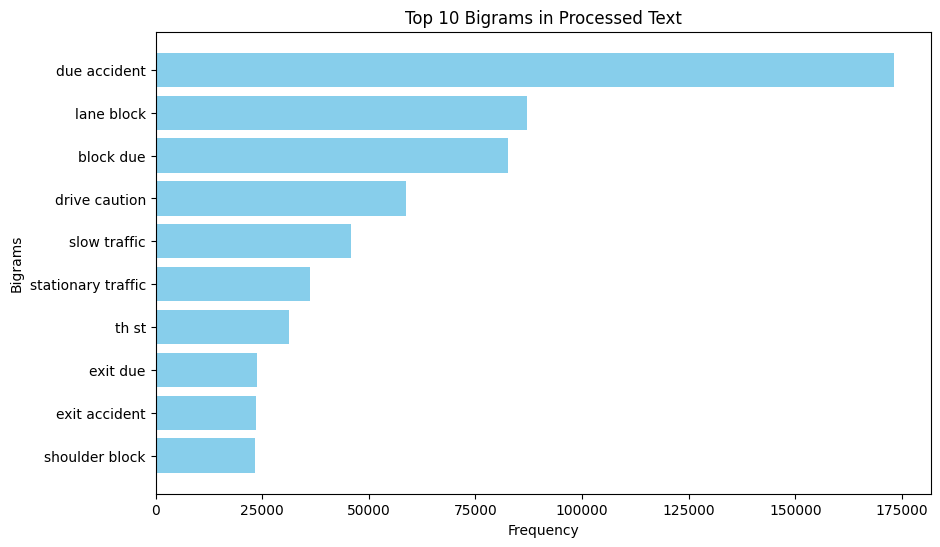

In [52]:
# Assuming 'sample_processed' is the result of applying text processing on a sample
text_data = sample_processed.tolist()

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the text data to count bigrams
X = vectorizer.fit_transform(text_data)

# Summarize the counts of each bigram
bigram_counts = X.sum(axis=0)
bigram_freq = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]

# Sort the bigrams by frequency
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Select top 10 bigrams for visualization
top_bigrams = bigram_freq[:10]
bigrams, counts = zip(*top_bigrams)

# Create a bar chart for the top bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigrams, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams in Processed Text')
plt.gca().invert_yaxis()
plt.show()

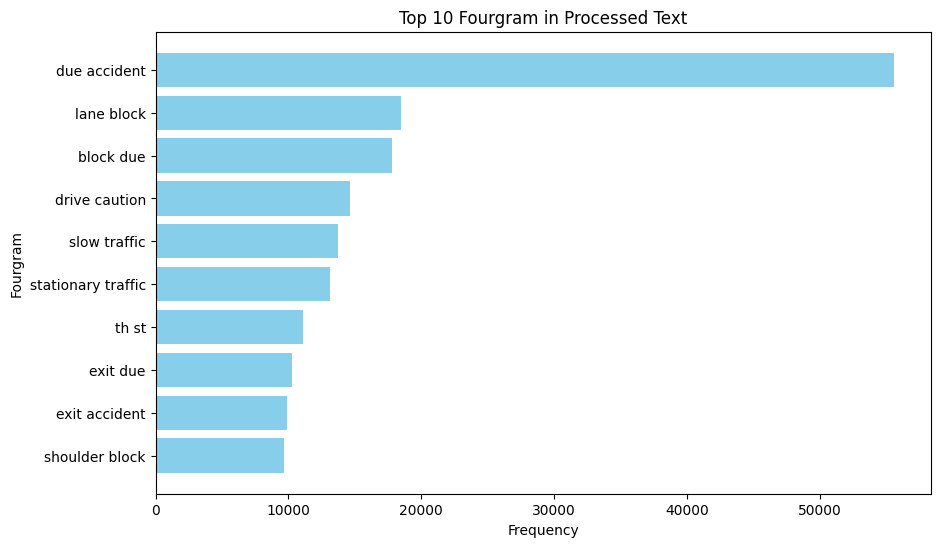

In [54]:
# Assuming 'sample_processed' is the result of applying text processing on a sample
text_data = sample_processed.tolist()

vectorizer = CountVectorizer(ngram_range=(4, 4))

X = vectorizer.fit_transform(text_data)

Fourgram_counts = X.sum(axis=0)
Fourgram_freq = [(Fourgram, Fourgram_counts[0, idx]) for Fourgram, idx in vectorizer.vocabulary_.items()]

Fourgram_freq = sorted(Fourgram_freq, key=lambda x: x[1], reverse=True)

top_Fourgram = Fourgram_freq[:10]
Fourgram, counts = zip(*top_Fourgram)

plt.figure(figsize=(10, 6))
plt.barh(bigrams, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Fourgram')
plt.title('Top 10 Fourgram in Processed Text')
plt.gca().invert_yaxis()
plt.show()

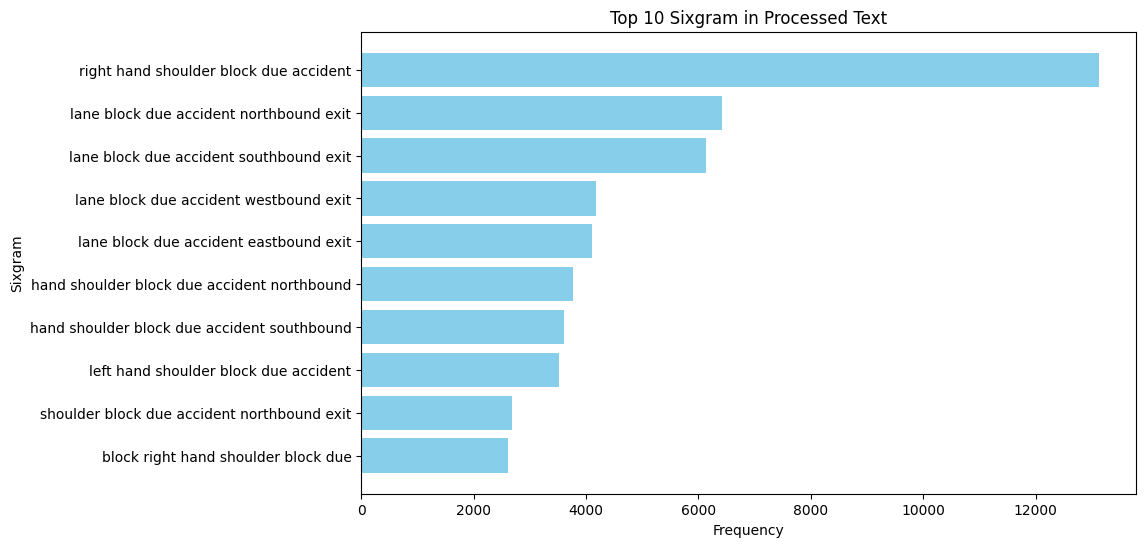

In [55]:
# Assuming 'sample_processed' is the result of applying text processing on a sample
text_data = sample_processed.tolist()

vectorizer = CountVectorizer(ngram_range=(6, 6))

X = vectorizer.fit_transform(text_data)

Sixgram_counts = X.sum(axis=0)
Sixgram_freq = [(Sixgram, Sixgram_counts[0, idx]) for Sixgram, idx in vectorizer.vocabulary_.items()]

Sixgram_freq = sorted(Sixgram_freq, key=lambda x: x[1], reverse=True)

top_Sixgram = Sixgram_freq[:10]
Sixgram, counts = zip(*top_Sixgram)

plt.figure(figsize=(10, 6))
plt.barh(Sixgram, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Sixgram')
plt.title('Top 10 Sixgram in Processed Text')
plt.gca().invert_yaxis()
plt.show()

1) Traffic Management: Understanding which lanes and directions are most commonly blocked can help with traffic routing and congestion management.

2) Infrastructure Planning: If certain directions consistently have higher incidences, it might suggest a need for infrastructure improvement or increased safety measures in those areas.

3) Emergency Response: Knowing the common locations of severe incidents can aid in strategizing emergency response deployment and preparedness.